# 分类问题

## 支持向量机

简单的人工数据集分类

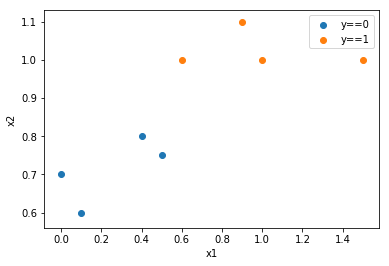

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
# from pandas.plotting import scatter_matrix
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
x = np.asarray(
    [[0.1, 0.6], [0.0, 0.7], [0.5, 0.75], [0.4, 0.8],
     [1.0, 1.0], [0.9, 1.1], [0.6, 1.0], [1.5, 1.0]])
y = np.asarray([0, 0, 0, 0, 1, 1, 1, 1])
plt.scatter(x=x[:,0][y==0], y=x[:,1][y==0], label='y==0')
plt.scatter(x=x[:,0][y==1], y=x[:,1][y==1], label='y==1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

0.0
w= [ 0.6   0.55] b= [-0.14749998]


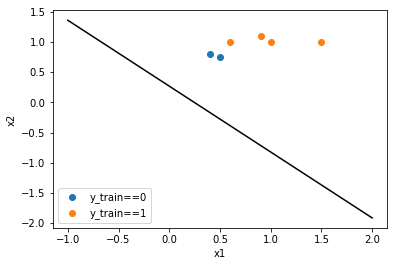

In [2]:
# 用train_test_split 将数据分为训练集和测试集
# test_size 测试集的占所有数据的份额， e.g. test_size=0.5 50%的数据为测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#用线性svm拟合训练数据
clf = svm.SVC(kernel='linear').fit(x_train, y_train)

# 预测值
y_pred = clf.predict(x_test)

# 进行一次模型校验
# 模型误差，正确率
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

# # 交叉验证
# from sklearn.model_selection import cross_val_score
# cvscore = cross_val_score(svm.SVC(kernel='linear'), x, y=y)
# print(cvscore)

w = clf.coef_[0]
b = clf.intercept_
print('w=', w, 'b=', b)
xx = np.asarray([-1,2])
yy = - w[0] * xx / w[1] - b[0] / w[1]
plt.plot(xx, yy, 'k-')
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(x=x_train[:,0][y_train==0], y=x_train[:,1][y_train==0], label='y_train==0')
plt.scatter(x=x_train[:,0][y_train==1], y=x_train[:,1][y_train==1], label='y_train==1')

plt.legend()


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.cross_validation import cross_val_score
x = np.asarray([[0.1, 0.1], [0.0, 0.2], [0.5, 0.2], [0.4, 0.0],
     [1.0, 1.0], [0.9, 1.1], [0.6, 1.0], [1.5, 1.0]])
y = np.asarray([0, 0, 0, 0, 1, 1, 1, 1])
df = pd.DataFrame(x, columns=['x1', 'x2'])
# scatter_matrix(df, alpha=0.5, diagonal='hist', figsize=(9,6))
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
clf = svm.SVC(kernel='linear')
# clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('x_test=', x_test, 'prediction=', y_pred)


x_test= [[ 0.1  0.1]
 [ 0.4  0. ]
 [ 0.5  0.2]] prediction= [0 0 1]


C:\Users\iota\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


w= [ 0.6  0.8] b= [-0.28000002]


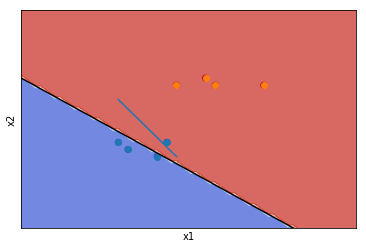

In [4]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

plt.subplot(111)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('')
plt.ylabel('')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())


w = clf.coef_[0]
b = clf.intercept_
print('w=', w, 'b=', b)
# get the separating hyperplane
# a = -w[0] / w[1]
xx = np.asarray([-1,2])
#     yy = 
yy = - w[0] * xx / w[1] - b[0] / w[1]
# # plot the parallels to the separating hyperplane that pass through the
# # support vectors
# b = clf.support_vectors_[0]
# yy_down = a * xx + (b[1] - a * b[0])
# b = clf.support_vectors_[-1]
# yy_up = a * xx + (b[1] - a * b[0])



# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot([w[0], 0], [0, w[1]])
#     plt.plot([0, w[0]], [w[1], 0])
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')


y_zero = y == 0
y_one = y == 1
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(df['x1'][y_zero], df['x2'][y_zero], label='y=0')
plt.scatter(df['x1'][y_one], df['x2'][y_one], label='y=1')

预测两个新的样本

In [5]:
x_new1 = [0.1, 0.2]
x_new2 = [1.3, 0.7]
wx1_plus_b = np.dot(clf.coef_, x_new1) + clf.intercept_
wx2_plus_b = np.dot(clf.coef_, x_new2) + clf.intercept_
print('w dot %s + b = %s; sign=%s' % (x_new1, wx1_plus_b, 
                                      np.sign(wx1_plus_b)))
print('w dot %s + b = %s; sign=%s' % (x_new2, wx2_plus_b, 
                                      np.sign(wx2_plus_b)))
print('model output of wx+b is: %s, %s' % 
      (clf.decision_function([x_new1]), clf.decision_function([x_new2])))
print('model output of actual class labels: %s' % clf.predict([x_new1, x_new2]))

w dot [0.1, 0.2] + b = [-0.06000002]; sign=[-1.]
w dot [1.3, 0.7] + b = [ 1.05999998]; sign=[ 1.]
model output of wx+b is: [-0.06000002], [ 1.05999998]
model output of actual class labels: [0 1]


## 用SVM分类iris数据集

In [6]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
np.set_printoptions(precision=3) #将打印浮点数的精度设为小数点后3位
iris = pd.read_csv('iris.csv')
iris_cols = iris.columns
print(iris.columns, '\n', iris.head())
#scatter_matrix(iris, alpha=0.5, diagonal='hist', figsize=(9,6))
print(np.unique(iris['Species']))

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object') 
    Sepal length  Sepal width  Petal length  Petal width Species
0           5.2          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.3  setosa
['setosa' 'versicolor' 'virginica']


In [7]:
mtrx = iris.as_matrix()
print(mtrx.shape)
x = mtrx[:, :-1]
y = mtrx[:, -1]
cols = iris_cols
print(x.shape, y.shape, cols)

(149, 5)
(149, 4) (149,) Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
print(np.unique(y))
y = le.transform(y)
print(np.unique(y))

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [9]:
x.shape 
x_cols = cols[:-1]
x_cols

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width'], dtype='object')

In [10]:
x_as_lists = list([list(xx) for xx in x])
df = pd.DataFrame(x_as_lists, columns=x_cols)
df.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.2,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F10232E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017F14290E80>]], dtype=object)

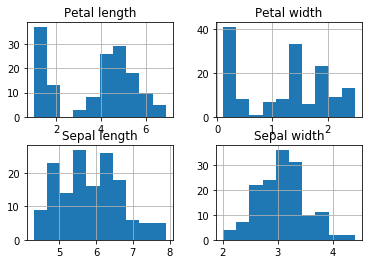

In [11]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F142FDE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017F15807668>]], dtype=object)

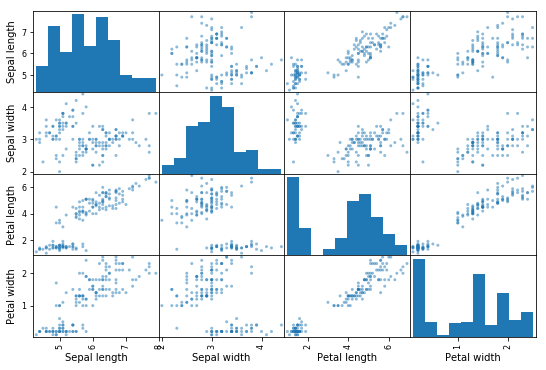

In [12]:
scatter_matrix(df, alpha=0.5, diagonal='hist', figsize=(9,6))

In [13]:
print('Cross validated accuracy: ', cross_val_score(svm.LinearSVC(C=1), x, y=y).mean())

Cross validated accuracy:  0.966111111111


Cross validated accuracy:  0.966111111111


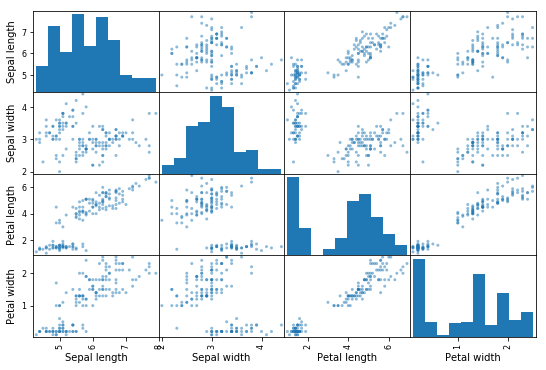

In [14]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0,  strategy="mean", axis=0)
x_imp = imp.fit(x).transform(x)
scatter_matrix(pd.DataFrame(list([list(xx) for xx in x_imp]), columns=x_cols), alpha=0.5, diagonal='hist', figsize=(9,6))
print('Cross validated accuracy: ', cross_val_score(svm.LinearSVC(C=1), x_imp, y=y).mean())

## 分类器的class_weight

unbalanced= 0.939103706344 balanced= 0.900901837333


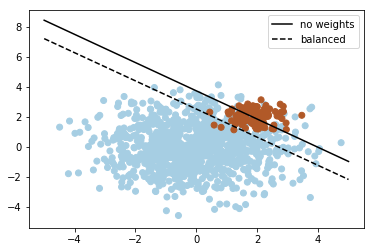

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import cross_val_score
#随机成 1000 : 100的数据集
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

#
# fit the model and get the separating hyperplane
clf = svm.LinearSVC(C=1.0)
clf.fit(X, y)

#
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.LinearSVC(C=1.0, class_weight='balanced')
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='balanced')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()
c1 = cross_val_score(svm.LinearSVC(C=1), X, y=y).mean()
c100 = cross_val_score(svm.LinearSVC(C=1, class_weight='balanced'), X, y=y).mean()
print('unbalanced=', c1, 'balanced=', c100)
plt.axis('tight')
plt.show()

## 不同的kernel对SVM的影响

(149, 4) (1100,)


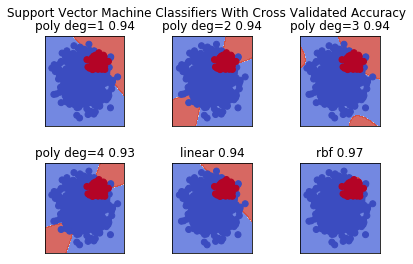

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import cross_val_score
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = np.asarray([0] * (n_samples_1) + [1] * (n_samples_2))

print(x.shape, y.shape)
h = 0.05  # step size in the mesh
C = 1.0  # SVM regularization parameter

clfs = []
clfs.append(svm.SVC(kernel='poly',degree=1, C=C).fit(X, y))
clfs.append(svm.SVC(kernel='poly', degree=2, C=C).fit(X, y))
clfs.append(svm.SVC(kernel='poly', degree=3, C=C).fit(X, y))
clfs.append(svm.SVC(kernel='poly', degree=4, C=C).fit(X, y))
clfs.append(svm.SVC(kernel='linear', C=C).fit(X, y))
clfs.append(svm.SVC(kernel='rbf', C=C).fit(X, y))

# title for the plots
titles = []
titles.append('poly deg=1')
titles.append('poly deg=2')
titles.append('poly deg=3')
titles.append('poly deg=4')
titles.append('linear')
titles.append('rbf')


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 3, i + 1)
    plt.subplots_adjust(wspace=0.6, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i] +  ' %.2f'%cross_val_score(clf, X, y=y).mean())

plt.suptitle('Support Vector Machine Classifiers With Cross Validated Accuracy')
plt.show()

## 不同的C对SVM的影响

(149, 4) (1100,)


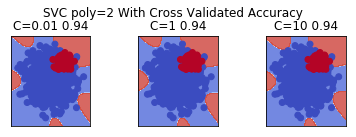

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.cross_validation import cross_val_score

rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = np.asarray([0] * (n_samples_1) + [1] * (n_samples_2))
print(x.shape, y.shape)
h = 0.05  # step size in the mesh
C = 1.0  # SVM regularization parameter

clfs = []
clfs.append(svm.SVC(kernel='poly', degree=5, C=0.01).fit(X, y))
clfs.append(svm.SVC(kernel='poly', degree=5, C=1).fit(X, y))
clfs.append(svm.SVC(kernel='poly', degree=5, C=100).fit(X, y))


# title for the plots
titles = []
titles.append('C=0.01')
titles.append('C=1')
titles.append('C=10')

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 3, i + 1)
    plt.subplots_adjust(wspace=0.6, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i] +  ' %.2f'%cross_val_score(clf, X, y=y).mean())

plt.suptitle('SVC poly=2 With Cross Validated Accuracy')
plt.show()

## 不同的max_depth对决策树的影响

(149, 4) (100,)


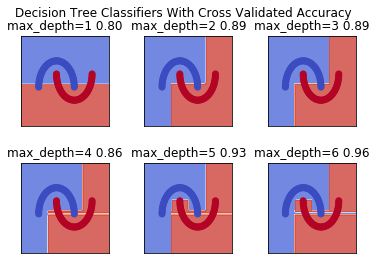

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

# import some data to play with

# rng = np.random.RandomState(0)
# n_samples_1 = 100
# n_samples_2 = 1000
# X = np.r_[1.5 * rng.randn(n_samples_1, 2),
#           0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
# y = [0] * (n_samples_1) + [1] * (n_samples_2)


X, y = datasets.make_moons(n_samples=100)
print(x.shape, y.shape)

h = .05  # step size in the mesh
clfs = []
clfs.append(DecisionTreeClassifier(max_depth=1).fit(X, y))
clfs.append(DecisionTreeClassifier(max_depth=2).fit(X, y))
clfs.append(DecisionTreeClassifier(max_depth=3).fit(X, y))
clfs.append(DecisionTreeClassifier(max_depth=4).fit(X, y))
clfs.append(DecisionTreeClassifier(max_depth=5).fit(X, y))
clfs.append(DecisionTreeClassifier(max_depth=6).fit(X, y))

# title for the plots
titles = []
titles.append('max_depth=1')
titles.append('max_depth=2')
titles.append('max_depth=3')
titles.append('max_depth=4')
titles.append('max_depth=5')
titles.append('max_depth=6')


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i] +  ' %.2f'%cross_val_score(clf, X, y=y).mean())

plt.suptitle('Decision Tree Classifiers With Cross Validated Accuracy')
plt.show()

# 搜索参数

## 决策树的参数搜索

In [19]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier

# get some data
digits = load_digits()
X_full, y_full = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33)
X = x_train
y = y_train

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


start = time()

param_grid = {"max_depth": [3, 10, None],
              "max_features": [2, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 0.74 seconds for 162 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.797 (std: 0.014)
Parameters: {'min_samples_split': 3, 'max_depth': None, 'min_samples_leaf': 2, 'criterion': 'entropy', 'max_features': 10}

Model with rank: 2
Mean validation score: 0.791 (std: 0.016)
Parameters: {'min_samples_split': 3, 'max_depth': 10, 'min_samples_leaf': 3, 'criterion': 'entropy', 'max_features': 10}

Model with rank: 3
Mean validation score: 0.788 (std: 0.041)
Parameters: {'min_samples_split': 10, 'max_depth': None, 'min_samples_leaf': 2, 'criterion': 'entropy', 'max_features': 10}



在测试集上测试模型正确率

In [20]:
y_pred = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=None, criterion='entropy', max_features=10).fit(x_train, y_train).predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.79292929292929293

## SVM的参数搜索

In [21]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import datasets
from sklearn.svm import SVC

# get some data
digits = datasets.load_digits()
X_full, y_full = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33)
X = x_train
y = y_train

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


start = time()

param_grid = {"C": [0.1, 1, 10],
              "kernel": ['rbf', 'linear', 'poly'],
              "degree": [2, 3, 10],
              "class_weight": [None, 'balanced'],
              "cache_size": [200, 400, 600]
                 }

# run grid search
grid_search = GridSearchCV(SVC(), param_grid=param_grid)
import warnings
warnings.filterwarnings("ignore")
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 34.06 seconds for 162 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.984 (std: 0.002)
Parameters: {'class_weight': None, 'C': 0.1, 'degree': 2, 'kernel': 'poly', 'cache_size': 200}

Model with rank: 1
Mean validation score: 0.984 (std: 0.001)
Parameters: {'class_weight': None, 'C': 0.1, 'degree': 3, 'kernel': 'poly', 'cache_size': 200}

Model with rank: 1
Mean validation score: 0.984 (std: 0.002)
Parameters: {'class_weight': 'balanced', 'C': 0.1, 'degree': 2, 'kernel': 'poly', 'cache_size': 200}

Model with rank: 1
Mean validation score: 0.984 (std: 0.001)
Parameters: {'class_weight': 'balanced', 'C': 0.1, 'degree': 3, 'kernel': 'poly', 'cache_size': 200}

Model with rank: 1
Mean validation score: 0.984 (std: 0.002)
Parameters: {'class_weight': None, 'C': 0.1, 'degree': 2, 'kernel': 'poly', 'cache_size': 400}

Model with rank: 1
Mean validation score: 0.984 (std: 0.001)
Parameters: {'class_weight': None, 'C': 0.1, 'degree': 3, 'kernel': 'pol